## Introduction/Business Problem

Recently, New York City (NYC) was ranked as the second best city for "Foodies", people who love food, by Wallethub.com. NYC was ranked this high due to the high density of restaurants, first in restaurants per capita, the high quality of the restaurants, and the diversity of the restaurants. On top of this, NYC was ranked 175 out of 180 by affordability. This would make NYC an attractive spot to open a restaurant. The city is known for having good restaurants and customers are already ready to pay high prices. The only problem is the difficulty in opening a succesful restaurant. Seeing this article, someone in New York hopes to open a restaurant but does not know in which borough to open. Most of all the person aims to avoid potential competition but also hopes to pay a small amount for rent and open in a borough where previous restaurants have been succesful.

## Data

This project will use Foursquare location data. This will allow for creating datasets that set apart different locations. The datasets will include proximity to other restauraunts. Restaurants in New York City will be separated by each borough. Additinally, a dataset obtained from the United States Census Burea will be used. The amount of money generated by food services and average amount of rent will be extracted from this dataset. Therefore, the final dataset will contain info on number of restaurants, total money grossed from the food industry, and average rent cost for each borough of New York City.

## Methodology

First, data was obtained from the Foursquare API. Thorugh this method, number of restaurants per borough was obtained. In order to normalize this data, restaurants per capita was calculated. Naturally, boroughs with more people will probably have more restaurants. Calculating the per capita values eliminates this bias. Along with this data, a dataframe was created containing the 'median gross rent' and the total accommodation and food services and sales. Once this dataframe was created a decision needed to be made. Therefore, a decision tree was made using algorithms in the sklearn library. This would help guide a potential person opening a restaurant in New York.

## Results

The dataframe used to build the decision tree can be seen below. RPC stands for restaurants per capita. TAF stands for total accomodataions and food services sales. MGR stands for mean gross rent.

In [83]:
final = pd.DataFrame(
    [(1000*bronx_num_res/1418207, 1.005, 1.176),
     (1000*bro_num_res/2559903, 2.453, 1.374),
     (1000*man_num_res/1628706, 20.382, 1.682),
     (1000*queens_num_res/2253858, 3.139, 1.520),
     (1000*staten_num_res/476143, .472, 1.282),
    ],
    index = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
    columns = ('RPC (for every thousand people)', 'TAF (per billion)', 'MGR (per thousand)')
)

final

,RPC (for every thousand people),TAF (per billion),MGR (per thousand)
Bronx,0.129741,1.005,1.176
Brooklyn,0.135552,2.453,1.374
Manhattan,0.198317,20.382,1.682
Queens,0.175255,3.139,1.520
Staten Island,0.142814,0.472,1.282


The decision tree built can be seen below.

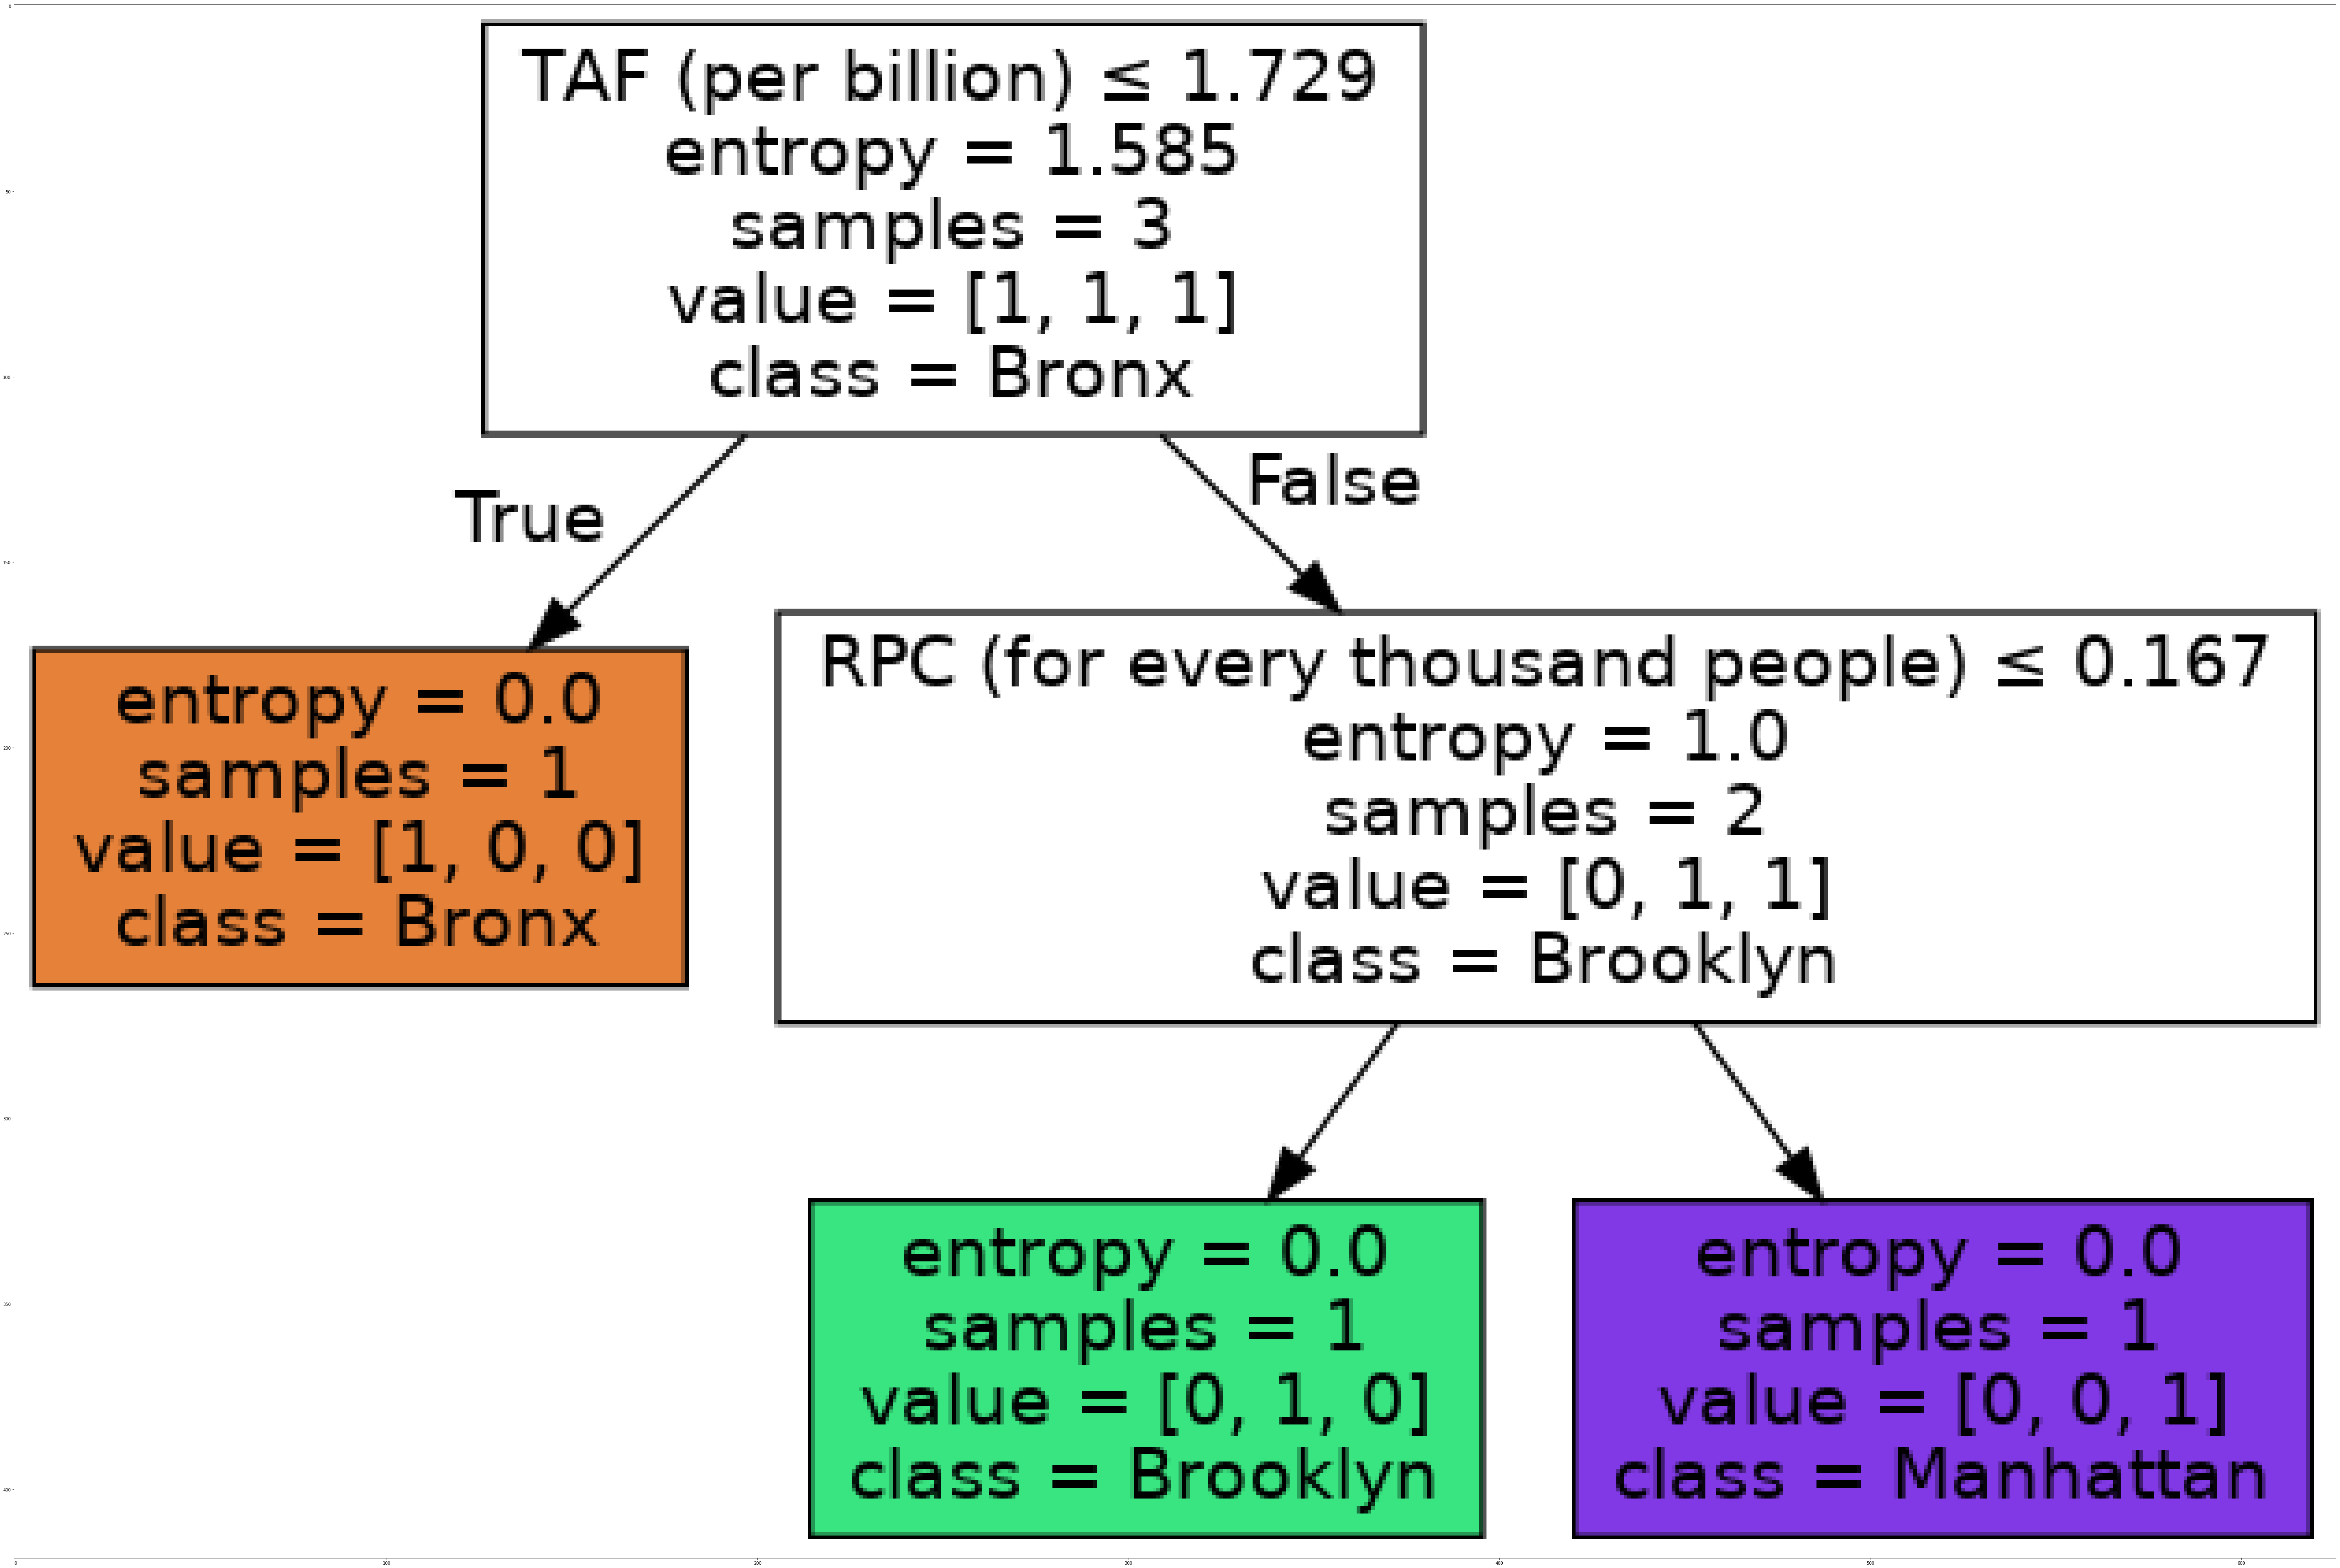

In [89]:
dot_data = StringIO()
filename = "boroughtree.png"
featureNames = final.columns[0:3]
targetNames = final.index.unique().tolist()
out=tree.export_graphviz(boroughTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Discussion

The decision tree built shows that a person opening a restaurant should consider the potential money they would make before making other decisions. The decision tree shows that this would eliminate the Bronx because the total grossed from the food and services industry in the bronx is below 1.729 billion. This means people may be less likely to spend money at restaurants in the Bronx. This also eliminates Staten Island, which has a less TAF than the Bronx. This leads to the second decision factor, restaurants per capita (RPC). A person who is looking to open with limited competition should choose somwhere with a lower amount pf restaurants. This separates Brooklyn and Manhattan as shown in the decision tree. Based on this decision tree, a potential restaurant owner should open their restaurant in Brooklyn. Not shown on the decision tree is Queens. While Queens does have a high TAF, its RPC is higher than Brooklyn. Therefore, Brooklyn remains the choice for the Borough in which to open a restaurant.

## Conclusion

Based on the analysis done above, Brooklyn would be the optimal borough in New York City in which to open a restaurant. Interestingly the machine learning algorithms chose TAF as the variable as the top indicator. This could be due to its values being naturally higher compared to the other data. In further research better attempts at normalizing data could be done to provide a better decision tree.

## Appendix

Importing necessary libraries for data retrieval and cleaning.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import json
import requests
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

Download data

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Create dataframe based on the different Boroughs

In [3]:
boroughs_data = newyork_data['features']

In [4]:
column_names = ['Borough', 'Latitude','Longitude']
boroughs = pd.DataFrame(columns=column_names)

In [5]:
for data in boroughs_data:
    borough = data['properties']['borough']
    
    coor = data['geometry']['coordinates']
    lat = coor[1]
    lng = coor[0]
    
    boroughs = boroughs.append({'Borough': borough, 'Latitude': lat, 'Longitude': lng}, ignore_index = True)

Credentials needed to use Foursquare API data.

In [90]:
CLIENT_ID = '****'
CLIENT_SECRET = '*****'
VERSION = '20200818'

In [8]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent = "ny_explorer")
location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude

Create function for finding types of venues from Foursquare API.

In [9]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Separate the Bronx location data

In [7]:
bronx_data = boroughs[boroughs['Borough'] == 'Bronx'].reset_index(drop = True)

Find all venues in the Bronx

In [10]:
rad = 500
bronx_venues = pd.DataFrame()

for i, row in bronx_data.iterrows():
    lat = bronx_data.loc[i, 'Latitude']
    lng = bronx_data.loc[i, 'Longitude']
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    rad)
    
    url
    
    result = requests.get(url).json()
    
    venues = result['response']['groups'][0]['items']
    
    nearby_venues = json_normalize(venues)
    
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues = nearby_venues.loc[:, filtered_columns]
    
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
    
    for k, vals in nearby_venues.iterrows():
        venue_row = pd.Series(vals.values)
        bronx_venues = bronx_venues.append(venue_row, ignore_index = True)

Filter out all of the venues that aren't restaurants or are fast food restaurants.

In [ ]:
bronx_venues.rename(columns = {0: "Name", 1: "Category", 2: "Latitude", 3: "Longitude"}, inplace = True)
bronx_restaurants = bronx_venues[bronx_venues['Category'].str.contains('Restaurant')]
bronx_restaurants = bronx_restaurants[bronx_restaurants['Category'] != 'Fast Food Restaurant']

In [12]:
bronx_restaurants

,Name,Category,Latitude,Longitude
17,Townhouse Restaurant,Restaurant,40.876086,-73.828868
25,Fish & Ting,Caribbean Restaurant,40.885656,-73.829197
28,Dyre Fish Market,Seafood Restaurant,40.889318,-73.831453
30,Golden Krust Caribbean Restaurant,Caribbean Restaurant,40.888488,-73.831083
33,Royal Caribbean Bakery,Caribbean Restaurant,40.888249,-73.831661
64,Leche y Miel,Latin American Restaurant,40.883742,-73.901857
66,El Malecon,Caribbean Restaurant,40.879338,-73.904457
72,El Economico Restaurant,Spanish Restaurant,40.879330,-73.904597
74,Estrellita Poblana V,Mexican Restaurant,40.879687,-73.906257
77,Picante Picante Mexican Restaurant,Mexican Restaurant,40.878252,-73.902936


In [13]:
manhattan_data = boroughs[boroughs['Borough'] == 'Manhattan'].reset_index(drop = True)

In [14]:
rad = 500
manhattan_venues = pd.DataFrame()

for i, row in manhattan_data.iterrows():
    lat = manhattan_data.loc[i, 'Latitude']
    lng = manhattan_data.loc[i, 'Longitude']
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    rad)
    
    url
    
    result = requests.get(url).json()
    
    venues = result['response']['groups'][0]['items']
    
    nearby_venues = json_normalize(venues)
    
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues = nearby_venues.loc[:, filtered_columns]
    
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
    
    for k, vals in nearby_venues.iterrows():
        venue_row = pd.Series(vals.values)
        manhattan_venues = manhattan_venues.append(venue_row, ignore_index = True)

In [15]:
manhattan_venues.rename(columns = {0: "Name", 1: "Category", 2: "Latitude", 3: "Longitude"}, inplace = True)
manhattan_restaurants = manhattan_venues[manhattan_venues['Category'].str.contains('Restaurant')]
manhattan_restaurants = manhattan_restaurants[manhattan_restaurants['Category'] != 'Fast Food Restaurant']

In [16]:
manhattan_restaurants

,Name,Category,Latitude,Longitude
13,Land & Sea Restaurant,Seafood Restaurant,40.877885,-73.905873
27,Kiki's,Greek Restaurant,40.714476,-73.992036
29,Spicy Village,Chinese Restaurant,40.717010,-73.993530
32,Wah Fung Number 1 Fast Food 華豐快餐店,Chinese Restaurant,40.717278,-73.994177
34,Xi'an Famous Foods,Chinese Restaurant,40.715232,-73.997263
36,Dimes,American Restaurant,40.714830,-73.991719
37,Da Yu Hot Pot 大渝火锅,Hotpot Restaurant,40.716735,-73.995752
38,Forgtmenot,New American Restaurant,40.714459,-73.991546
43,Cervo's,Spanish Restaurant,40.714763,-73.991455
48,"Happy Lamb Hot Pot, Manhattan",Hotpot Restaurant,40.717639,-73.995187


In [17]:
queens_data = boroughs[boroughs['Borough'] == 'Queens'].reset_index(drop = True)

In [18]:
rad = 500
queens_venues = pd.DataFrame()

for i, row in queens_data.iterrows():
    lat = queens_data.loc[i, 'Latitude']
    lng = queens_data.loc[i, 'Longitude']
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    rad)
    
    url
    
    result = requests.get(url).json()
    
    venues = result['response']['groups'][0]['items']
    
    nearby_venues = json_normalize(venues)
    
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues = nearby_venues.loc[:, filtered_columns]
    
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
    
    for k, vals in nearby_venues.iterrows():
        venue_row = pd.Series(vals.values)
        queens_venues = queens_venues.append(venue_row, ignore_index = True)

In [19]:
queens_venues.rename(columns = {0: "Name", 1: "Category", 2: "Latitude", 3: "Longitude"}, inplace = True)
queens_restaurants = queens_venues[queens_venues['Category'].str.contains('Restaurant')]
queens_restaurants = queens_restaurants[queens_restaurants['Category'] != 'Fast Food Restaurant']

In [20]:
queens_restaurants

,Name,Category,Latitude,Longitude
0,Favela Grill,Brazilian Restaurant,40.767348,-73.917897
5,Off The Hook,Seafood Restaurant,40.767200,-73.918104
6,Al-sham Sweets and Pastries,Middle Eastern Restaurant,40.768077,-73.911561
10,The Gully,Indian Restaurant,40.766719,-73.912410
11,Sabry's,Seafood Restaurant,40.768446,-73.911267
12,AbuQir Seafood,Seafood Restaurant,40.768577,-73.911169
13,Duzan,Falafel Restaurant,40.768730,-73.911013
14,SVL Bar,Greek Restaurant,40.769816,-73.918530
15,Zyara Restaurant,Restaurant,40.766591,-73.912713
17,El Cafetal,Mexican Restaurant,40.770153,-73.918214


In [21]:
brooklyn_data = boroughs[boroughs['Borough'] == 'Brooklyn'].reset_index(drop = True)

In [22]:
rad = 500
brooklyn_venues = pd.DataFrame()

for i, row in brooklyn_data.iterrows():
    lat = brooklyn_data.loc[i, 'Latitude']
    lng = brooklyn_data.loc[i, 'Longitude']
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    rad)
    
    url
    
    result = requests.get(url).json()
    
    venues = result['response']['groups'][0]['items']
    
    nearby_venues = json_normalize(venues)
    
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues = nearby_venues.loc[:, filtered_columns]
    
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
    
    for k, vals in nearby_venues.iterrows():
        venue_row = pd.Series(vals.values)
        brooklyn_venues = brooklyn_venues.append(venue_row, ignore_index = True)

In [23]:
brooklyn_venues.rename(columns = {0: "Name", 1: "Category", 2: "Latitude", 3: "Longitude"}, inplace = True)
brooklyn_restaurants = brooklyn_venues[brooklyn_venues['Category'].str.contains('Restaurant')]
brooklyn_restaurants = brooklyn_restaurants[brooklyn_restaurants['Category'] != 'Fast Food Restaurant']

In [24]:
brooklyn_restaurants

,Name,Category,Latitude,Longitude
9,Blue Door Souvlakia,Greek Restaurant,40.624567,-74.030311
11,Karam,Middle Eastern Restaurant,40.622931,-74.028316
17,Tuscany Grill,Italian Restaurant,40.622913,-74.031387
18,Elia Restaurant,Greek Restaurant,40.623090,-74.031156
19,Georgian Dream Cafe and Bakery,Caucasian Restaurant,40.625586,-74.030196
24,Greenhouse Cafe,American Restaurant,40.629542,-74.028514
25,XIN,Chinese Restaurant,40.625082,-74.030494
26,Chadwick's Restaurant,American Restaurant,40.621450,-74.031964
27,Cebu' Bar & Bistro,New American Restaurant,40.621812,-74.031727
28,Zio Toto,Italian Restaurant,40.624791,-74.030551


In [29]:
staten_data = boroughs[boroughs['Borough'] == 'Staten Island'].reset_index(drop = True)

In [31]:
rad = 500
staten_venues = pd.DataFrame()

for i, row in staten_data.iterrows():
    lat = staten_data.loc[i, 'Latitude']
    lng = staten_data.loc[i, 'Longitude']
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    rad)
    
    url
    
    result = requests.get(url).json()
    
    venues = result['response']['groups'][0]['items']
    
    nearby_venues = json_normalize(venues)
    
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues = nearby_venues.loc[:, filtered_columns]
    
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
    
    for k, vals in nearby_venues.iterrows():
        venue_row = pd.Series(vals.values)
        staten_venues = staten_venues.append(venue_row, ignore_index = True)

KeyError: "None of [Index(['venue.name', 'venue.categories', 'venue.location.lat',\n       'venue.location.lng'],\n      dtype='object')] are in the [columns]"

In [27]:
staten_venues.rename(columns = {0: "Name", 1: "Category", 2: "Latitude", 3: "Longitude"}, inplace = True)
staten_restaurants = staten_venues[staten_venues['Category'].str.contains('Restaurant')]
staten_restaurants = staten_restaurants[staten_restaurants['Category'] != 'Fast Food Restaurant']

In [28]:
staten_restaurants

,Name,Category,Latitude,Longitude
0,Beso,Tapas Restaurant,40.643306,-74.076508
7,Enoteca Maria,Italian Restaurant,40.641941,-74.077320
9,Marie's 2,Italian Restaurant,40.642176,-74.076669
10,The Gavel Grill,American Restaurant,40.642157,-74.076674
26,Papa's Halal Chicken & Kebab,Falafel Restaurant,40.643683,-74.077483
43,Lakruwana,Sri Lankan Restaurant,40.625654,-74.075174
44,Bay House Bistro,Asian Restaurant,40.627827,-74.076244
46,Campo Bello Restaurante,Spanish Restaurant,40.624463,-74.079652
48,El Patron Restaurant & Lounge Inc.,Mexican Restaurant,40.629154,-74.076541
53,Vida,Restaurant,40.628723,-74.079802


Extracts total number of restaurants form each above dataframe.

In [41]:
bronx_num_res = bronx_restaurants.shape[0]
man_num_res = manhattan_restaurants.shape[0]
queens_num_res = queens_restaurants.shape[0]
bro_num_res = brooklyn_restaurants.shape[0]
staten_num_res = staten_restaurants.shape[0]

Data from United States Census Bureau, https://www.census.gov/quickfacts/fact/table/newyorkcitynewyork,bronxcountybronxboroughnewyork,kingscountybrooklynboroughnewyork,newyorkcountymanhattanboroughnewyork,queenscountyqueensboroughnewyork,richmondcountystatenislandboroughnewyork/PST045219

In [49]:
per_capita_restaurants = pd.DataFrame (
{
    "Bronx RPC": [bronx_num_res/1418207],
    "Brooklyn RPC": [bro_num_res/2559903],
    "Manhattan RPC": [man_num_res/1628706],
    "Queens RPC": [queens_num_res/2253858],
    "Staten Island RPC": [staten_num_res/476143],
}
)

In [50]:
per_capita_restaurants

,Bronx RPC,Brooklyn RPC,Manhattan RPC,Queens RPC,Staten Island RPC
0,0.00013,0.000136,0.000198,0.000175,0.000143


restaurants per capita, total accomodation and food services (per billion), median gross rent

Import libraries to create a decision tree.

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Create training and testing datasets.

In [85]:
y = final.index
X = final[['RPC (for every thousand people)', 'TAF (per billion)', 'MGR (per thousand)']].values

In [86]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

Create decision tree

In [87]:
boroughTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [88]:
boroughTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Import plotting libraries

In [ ]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

In [80]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
import matplotlib.pyplot as plt